# Question 2
Dataset: data1_0.33.csv
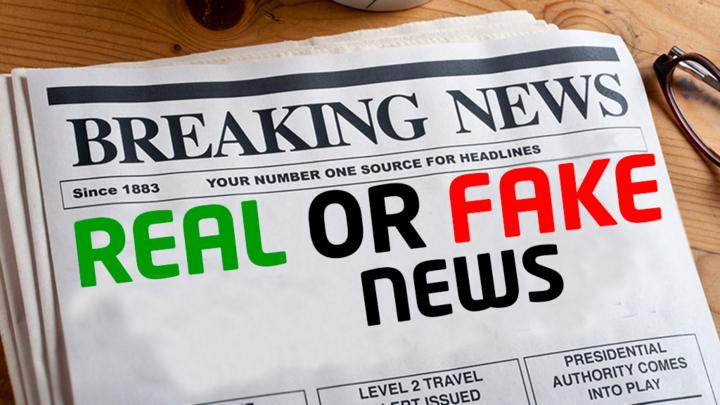

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Import Dataset

In [5]:
df = pd.read_csv("./Data/data1_0.33.csv", header = None, index_col = False)
print(df)


            0         1  2
0    0.046000 -0.181767  0
1    0.102303  0.116327  0
2   -0.131546 -0.038680  0
3    0.007224 -0.067146  0
4    0.112290  0.040584  0
..        ...       ... ..
939  0.936823  0.419212  1
940 -0.977857 -0.339089  1
941 -0.652390 -0.833284  1
942 -0.874535 -0.704729  1
943  0.855564 -0.564038  1

[944 rows x 3 columns]


In [ ]:
df['feature1'] = df[:][0]
df['feature2'] = df[:][1]
df['class'] = df[2][:]

In [7]:
df = df[['feature1', 'feature2', 'class']]

Data Visualization

In [8]:
df.head()

,feature1,feature2,class
0,0.046000,-0.181767,0
1,0.102303,0.116327,0
2,-0.131546,-0.038680,0
3,0.007224,-0.067146,0
4,0.112290,0.040584,0


<AxesSubplot:xlabel='class', ylabel='count'>

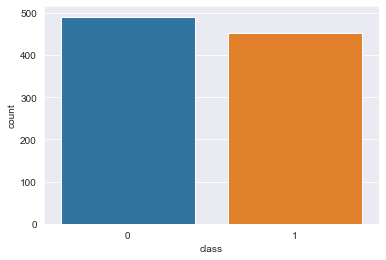

In [9]:
sns.set_style("darkgrid")
sns.countplot(x = "class", data = df)

This shows the number of records for each class. From this figure, we can see that the are alomst same records for each class and we can apply ML without any SMOTE.

## 3. Data Pre-processing

Remove null values

In [10]:
df.isna().sum() # Checking for nan Values

feature1    0
feature2    0
class       0
dtype: int64

Split dataest as training and test dataset

In [11]:
X = df[['feature1', 'feature2']]
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Initial Hyper Parameters

In [12]:
batch_size = 32
epoch_num = 200
nodes = [4, 8, 12, 16]
lr_set = [0.05, 0.01, 0.005]

## Single Hidden Layer Model

In [13]:
def createSingleModel(node, lr):    
    model = Sequential()
    model.add(Dense(node, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [14]:
single_acc = np.zeros([len(nodes), len(lr_set)])
for i in range(len(nodes)):
    for j in range(len(lr_set)):
        model = createSingleModel(nodes[i], lr_set[j])
        model.fit(x_train, y_train, batch_size = batch_size, validation_data = (x_test,y_test), epochs = epoch_num)
        single_acc[i][j] = model.evaluate(x_test, y_test)[1] * 100

Epoch 1/200
21/21 [==============================] - 1s 13ms/step - loss: 0.7032 - accuracy: 0.4818 - val_loss: 0.7017 - val_accuracy: 0.4965
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5227 - val_loss: 0.6947 - val_accuracy: 0.5035
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5227 - val_loss: 0.6904 - val_accuracy: 0.4930
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5106 - val_loss: 0.6992 - val_accuracy: 0.4754
Epoch 5/200
21/21 [==============================] - ETA: 0s - loss: 0.7141 - accuracy: 0.46 - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5379 - val_loss: 0.6989 - val_accuracy: 0.5070
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5091 - val_loss: 0.6941 - val_accuracy: 0.4930
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4970 - val_loss: 

Find the best Hyperparameters

In [ ]:
df_single_acc = pd.DataFrame(single_acc, index = nodes, columns = lr_set)
print(df_single_acc)

        0.050      0.010      0.005
4   56.690139  51.760566  51.408452
8   59.507042  54.577464  59.507042
12  55.985916  52.112675  54.225349
16  58.098590  61.971831  58.802819


This shows that the test accuracy is the highest when the number of units is 16 and learning rate is 0.01. Hence, we use these values to build model.

In [ ]:
best_node = 16
best_lr = 0.01
model = createSingleModel(best_node, best_lr)
history = model.fit(x_train, y_train, batch_size = batch_size, validation_data = (x_test,y_test), epochs = epoch_num)

Epoch 1/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5030 - val_loss: 0.6908 - val_accuracy: 0.5211
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5152 - val_loss: 0.6897 - val_accuracy: 0.5528
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5242 - val_loss: 0.6910 - val_accuracy: 0.5423
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5379 - val_loss: 0.6894 - val_accuracy: 0.5528
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5455 - val_loss: 0.6906 - val_accuracy: 0.5387
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5288 - val_loss: 0.6928 - val_accuracy: 0.5106
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5591 - val_loss: 0.6882 - val_accuracy: 0.5493
Epoch 8/200
2

In [ ]:
model.summary()

Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_331 (Dense)           (None, 16)                48        
                                                                 
 dense_332 (Dense)           (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Calculate the train and test accuracy using trained model

In [ ]:
train_acc = model.evaluate(x_train, y_train)[1] * 100
test_acc = model.evaluate(x_test, y_test)[1] * 100
acc = pd.DataFrame([train_acc, test_acc], index = ['Train Dataset','Test Dataset'], columns = ['Accuracy(%)'])
print(acc)

9/9 [==============================] - 0s 623us/step - loss: 0.6530 - accuracy: 0.5810
               Accuracy(%)
Train Dataset    67.121214
Test Dataset     58.098590


The training and test accuray of selected model are 75% and 72.63%. It shows that single hidden layer model did’t fit well.

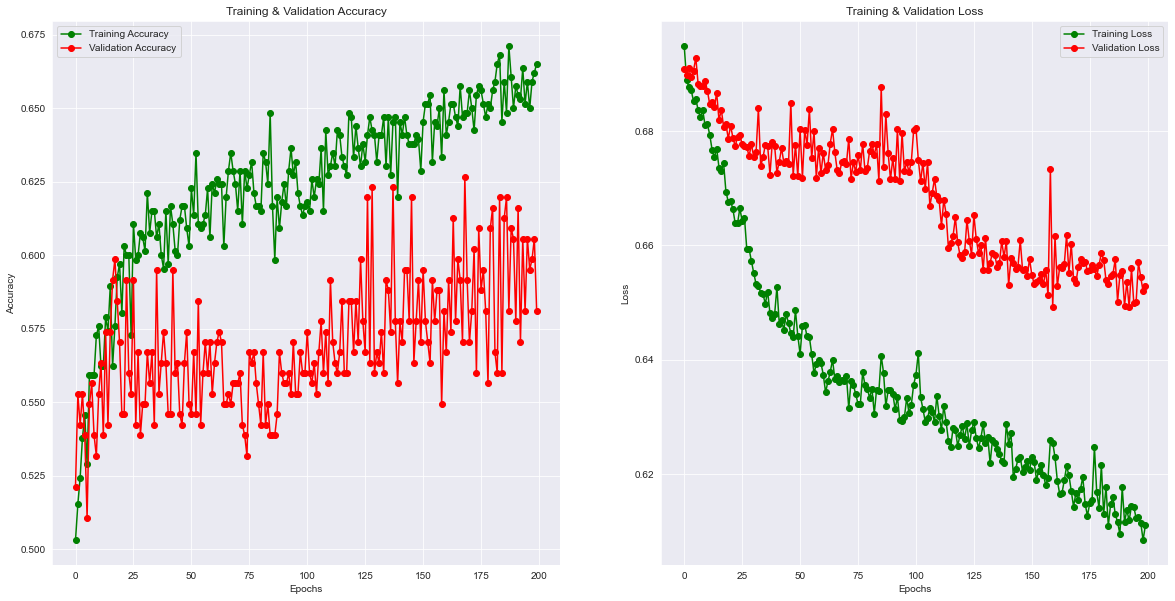

In [ ]:
epochs = [i for i in range(epoch_num)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, pred, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63       148
           1       0.58      0.46      0.51       136

    accuracy                           0.58       284
   macro avg       0.58      0.58      0.57       284
weighted avg       0.58      0.58      0.58       284



In [ ]:
cm = confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm , index = ['0', '1'] , columns = ['0', '1'])

<AxesSubplot:>

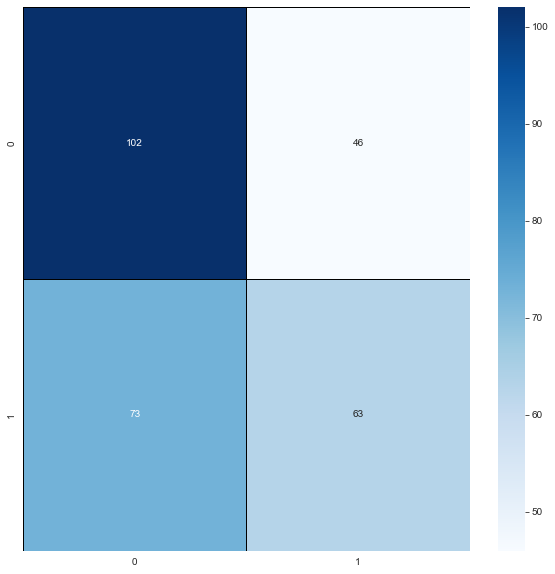

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['0', '1'] , yticklabels = ['0', '1'])

## Double Hidden Layers Model

1. Regularization: Train a model without regularization

In [ ]:
def createDoubleModel(node1, node2, lr):    
    model = Sequential()
    model.add(Dense(node1, activation = 'relu'))
    model.add(Dense(node2, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
double_acc = np.zeros([len(nodes)*len(nodes), len(lr_set)])
node_comb = []
for i in range(len(nodes)):
    for j in range(len(nodes)):
        node_comb.append([nodes[i], nodes[j]])
        for k in range(len(lr_set)):
            model = createDoubleModel(nodes[i], nodes[j], lr_set[k])
            model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = epoch_num)
            double_acc[i * len(nodes) + j][k] = model.evaluate(x_test, y_test)[1] * 100

Epoch 1/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.4682 - val_loss: 0.6904 - val_accuracy: 0.5211
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5197 - val_loss: 0.6903 - val_accuracy: 0.5211
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5076 - val_loss: 0.6874 - val_accuracy: 0.5211
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5197 - val_loss: 0.6824 - val_accuracy: 0.5211
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5530 - val_loss: 0.6822 - val_accuracy: 0.5634
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5470 - val_loss: 0.6666 - val_accuracy: 0.5704
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5273 - val_loss: 0.6720 - val_accuracy: 0.5599
Epoch 8/200
2

Find the best Hyperparameters

In [ ]:
str_node = []
for node in node_comb:
    str_node.append(str(node[0]) + ',' + str(node[1]))
df_double_acc = pd.DataFrame(double_acc, index = str_node, columns = lr_set)
print(df_double_acc)

           0.050      0.010      0.005
4,4    53.873241  68.309861  53.521127
4,8    52.112675  68.309861  58.098590
4,12   52.112675  82.394367  66.901410
4,16   52.112675  63.380283  59.154928
8,4    56.338030  60.211265  54.577464
8,8    52.112675  88.732392  79.225349
8,12   52.112675  75.000000  88.732392
8,16   60.915494  78.521127  67.605633
12,4   65.845072  78.169012  76.760566
12,8   92.253524  83.098590  70.070422
12,12  59.507042  89.788735  75.352114
12,16  59.507042  94.014084  91.197181
16,4   52.112675  60.563380  61.619717
16,8   52.112675  91.197181  78.521127
16,12  52.112675  85.915494  93.309861
16,16  50.704223  90.845072  70.422536


It shows that the test accuracy is the highest when the number of units is 12, 8 and learning rate is 0.01.

In [ ]:
best_node1 = 12
best_node2 = 8
best_lr = 0.01
model = createDoubleModel(best_node1, best_node2, best_lr)
history = model.fit(x_train, y_train, batch_size = batch_size, validation_data = (x_test,y_test), epochs = epoch_num)

Epoch 1/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.5076 - val_loss: 0.6946 - val_accuracy: 0.5035
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5424 - val_loss: 0.6916 - val_accuracy: 0.5387
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5424 - val_loss: 0.6895 - val_accuracy: 0.5387
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5545 - val_loss: 0.6876 - val_accuracy: 0.5282
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5394 - val_loss: 0.6832 - val_accuracy: 0.5387
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5803 - val_loss: 0.6781 - val_accuracy: 0.5352
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5561 - val_loss: 0.6706 - val_accuracy: 0.5387
Epoch 8/200
2

In [ ]:
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 12)                36        
                                                                 
 dense_171 (Dense)           (None, 8)                 104       
                                                                 
 dense_172 (Dense)           (None, 1)                 9         
                                                                 
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_acc = model.evaluate(x_train, y_train)[1] * 100
test_acc = model.evaluate(x_test, y_test)[1] * 100
acc = pd.DataFrame([train_acc, test_acc], index = ['Train Dataset','Test Dataset'], columns = ['Accuracy(%)'])
print(acc)

9/9 [==============================] - 0s 748us/step - loss: 0.5933 - accuracy: 0.6972
               Accuracy(%)
Train Dataset    80.454546
Test Dataset     69.718307


The training and test accuray of selected model are 98.33% and 96.13%. It shows that double hidden layers model fit well

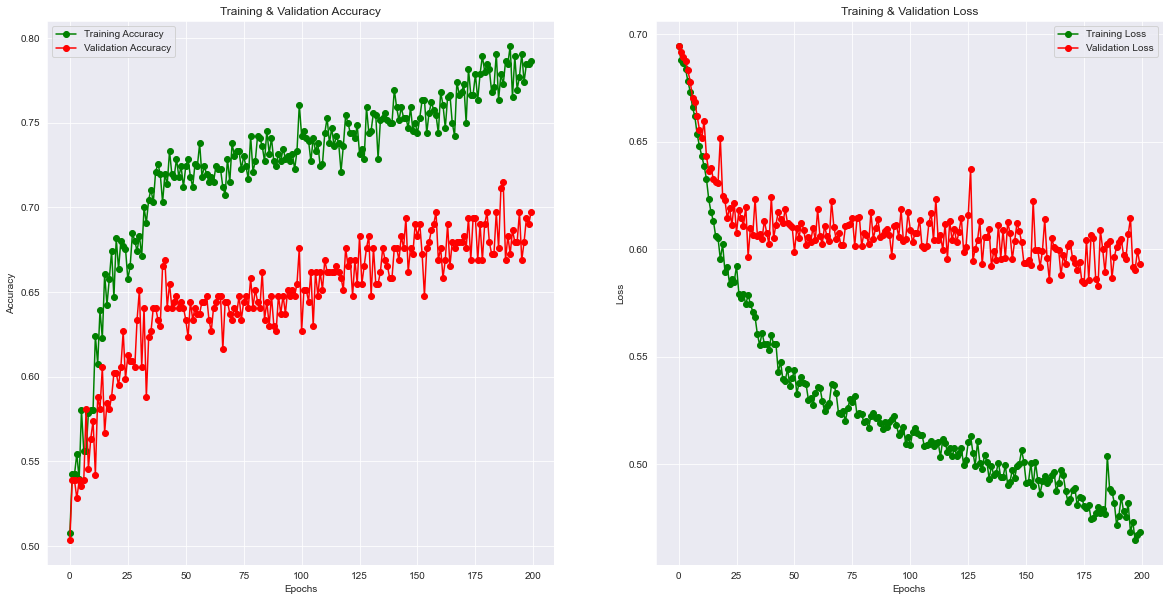

In [ ]:
epochs = [i for i in range(epoch_num)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, pred, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       148
           1       0.65      0.78      0.71       136

    accuracy                           0.70       284
   macro avg       0.70      0.70      0.70       284
weighted avg       0.71      0.70      0.70       284



In [ ]:
cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm , index = ['0', '1'] , columns = ['0', '1'])

<AxesSubplot:>

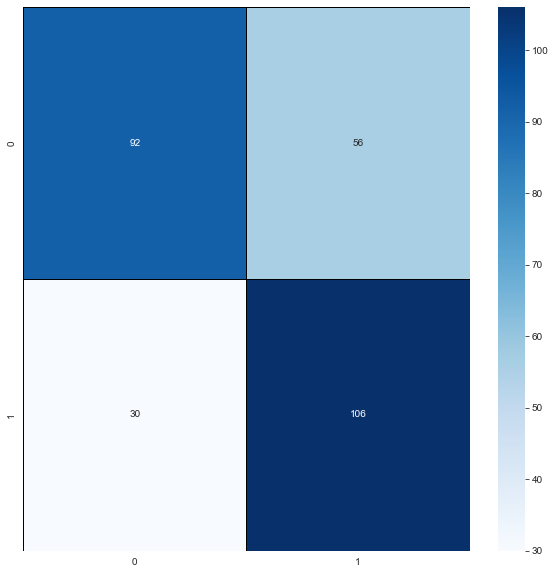

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, cmap= "Blues", linecolor = 'black', linewidth = 1, annot = True, fmt='', xticklabels = ['0', '1'], yticklabels = ['0', '1'])

## Minimal network

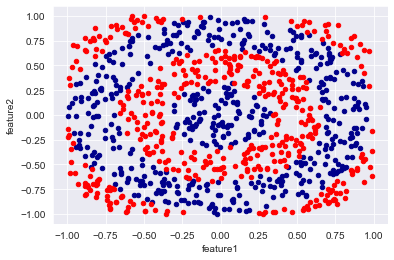

In [ ]:

ax1 = df[df['class']==0].plot.scatter(x='feature1',
                      y='feature2',
                      c='DarkBlue')
ax2 = df[df['class']==1].plot.scatter(x='feature1',
y='feature2',
c='Red',ax=ax1)

As we can see easily if we convert this dataset to polar coordinates, we can reduce the dimension. Hence, we add one column ‘dist’.

In [ ]:
df['dist'] = np.sqrt(df['feature1']**2+df['feature2']**2)

In [ ]:
df.head()

,feature1,feature2,class,dist
0,0.046000,-0.181767,0,0.187498
1,0.102303,0.116327,0,0.154913
2,-0.131546,-0.038680,0,0.137115
3,0.007224,-0.067146,0,0.067533
4,0.112290,0.040584,0,0.119399


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['dist'], df['class'], test_size = 0.3, random_state = 0)

In [ ]:
batch_size = 32
epoch_num = 200
nodes = [4, 8, 12, 16,32]
lr_set = [0.05, 0.01, 0.005,0.001]

In [ ]:
def createMinimalNetwork(node, lr):    
    model = Sequential()
    model.add(Dense(node, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
minimal_acc = np.zeros([len(nodes), len(lr_set)])
for i in range(len(nodes)):
    for j in range(len(lr_set)):
        model = createMinimalNetwork(nodes[i], lr_set[j])
        model.fit(x_train, y_train, batch_size = batch_size, validation_data = (x_test,y_test), epochs = epoch_num)
        minimal_acc[i][j] = model.evaluate(x_test, y_test)[1] * 100

Epoch 1/200
21/21 [==============================] - 0s 5ms/step - loss: 0.7202 - accuracy: 0.4470 - val_loss: 0.6954 - val_accuracy: 0.5352
Epoch 2/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5894 - val_loss: 0.6932 - val_accuracy: 0.5599
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5212 - val_loss: 0.6934 - val_accuracy: 0.5211
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5379 - val_loss: 0.6932 - val_accuracy: 0.5211
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5773 - val_loss: 0.6931 - val_accuracy: 0.5669
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5439 - val_loss: 0.6944 - val_accuracy: 0.6901
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5985 - val_loss: 0.6931 - val_accuracy: 0.5211
Epoch 8/200
2

Find the best Hyperparameters

In [ ]:
df_minimal_acc = pd.DataFrame(minimal_acc, index = nodes, columns = lr_set)
print(df_minimal_acc)

        0.050      0.010      0.005      0.001
4   85.915494  52.112675  52.112675  52.112675
8   52.112675  41.197184  56.690139  60.211265
12  52.112675  57.394367  66.549295  67.957747
16  52.112675  36.971831  52.816904  59.859157
32  52.112675  96.830988  44.718310  57.746476


shows the test accuracy with various hyperparameters and the best hyperparameters for this dataset is (12, 0.05).

Train Minimal Network with best hyperparameters

In [ ]:
best_node = 12
best_lr = 0.05
model = createMinimalNetwork(best_node, best_lr)
history = model.fit(x_train, y_train, batch_size = batch_size, validation_data = (x_test,y_test), epochs = epoch_num)

Epoch 1/200
21/21 [==============================] - 0s 5ms/step - loss: 0.7058 - accuracy: 0.5030 - val_loss: 0.6952 - val_accuracy: 0.4859
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4864 - val_loss: 0.6928 - val_accuracy: 0.6232
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5242 - val_loss: 0.6935 - val_accuracy: 0.5211
Epoch 4/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5197 - val_loss: 0.6923 - val_accuracy: 0.5211
Epoch 5/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4727 - val_loss: 0.6929 - val_accuracy: 0.5211
Epoch 6/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5106 - val_loss: 0.6928 - val_accuracy: 0.4965
Epoch 7/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5182 - val_loss: 0.6926 - val_accuracy: 0.5211
Epoch 8/200
2

In [ ]:
model.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_213 (Dense)           (None, 12)                24        
                                                                 
 dense_214 (Dense)           (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Compute the train and test accuracy

In [ ]:
train_acc = model.evaluate(x_train, y_train)[1] * 100
test_acc = model.evaluate(x_test, y_test)[1] * 100
acc = pd.DataFrame([train_acc, test_acc], index = ['Train Dataset','Test Dataset'], columns = ['Accuracy(%)'])
print(acc)

9/9 [==============================] - 0s 747us/step - loss: 0.5296 - accuracy: 0.7113
               Accuracy(%)
Train Dataset    68.030304
Test Dataset     71.126759


The training and test accuracy are 96.97% and 96.13%. As we can see easily, we have got very high accuracy than previous single layer model with used original dataset. It shows that the converting gives the chance to get high accuracy with reducing dimension.

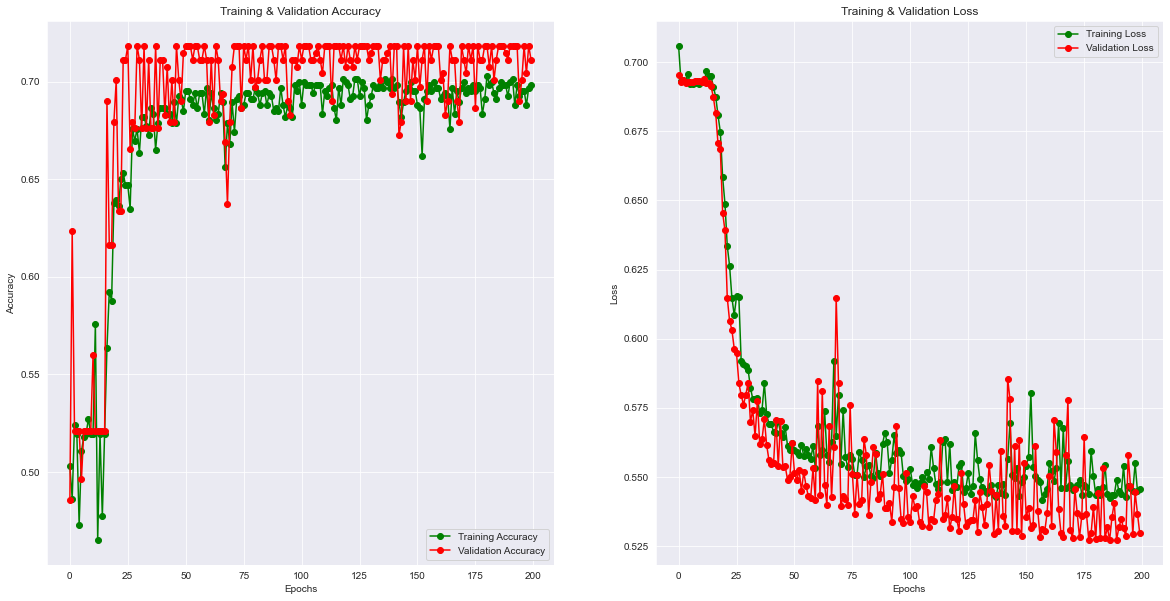

In [ ]:
epochs = [i for i in range(epoch_num)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

Compute classification result

In [ ]:
pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, pred, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       148
           1       0.97      0.41      0.58       136

    accuracy                           0.71       284
   macro avg       0.81      0.70      0.68       284
weighted avg       0.80      0.71      0.68       284



Compute Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm , index = ['0', '1'] , columns = ['0', '1'])

<AxesSubplot:>

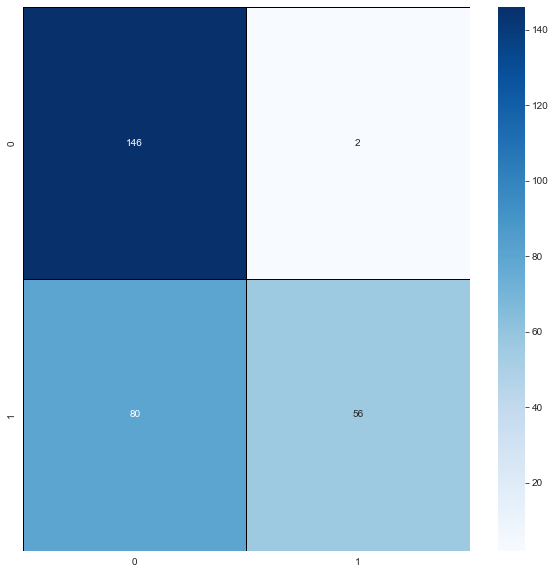

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, cmap= "Blues", linecolor = 'black', linewidth = 1, annot = True, fmt='', xticklabels = ['0', '1'], yticklabels = ['0', '1'])